In [143]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
import numpy as np

In [144]:
simulator='ibmq_qasm_simulator'

In [145]:
n=3

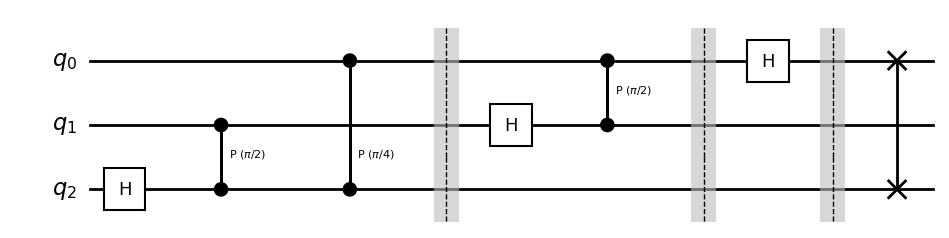

In [146]:
qft=QuantumCircuit(n,name='QFT')

for i in range(n-1,-1,-1):
    qft.h(i)
    for j in range(1,i+1):
        qft.cp(np.pi/(2**j),i-j,i)
    qft.barrier()
for i in range((n)//2):
    qft.swap(i,n-i-1)

qft.draw(output='mpl',style='bw')

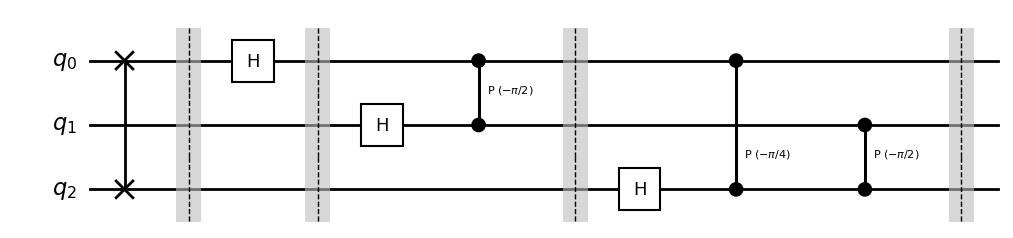

In [147]:
iqft=QuantumCircuit(n,name='IQFT')

for i in range(n//2):
    iqft.swap(i,n-i-1)
iqft.barrier()
for i in range(n):
    iqft.h(i)
    for j in range(i):
        iqft.cp(-np.pi/(2**(i-j)),j,i)
    iqft.barrier()
    
iqft.draw(output='mpl',style='bw')

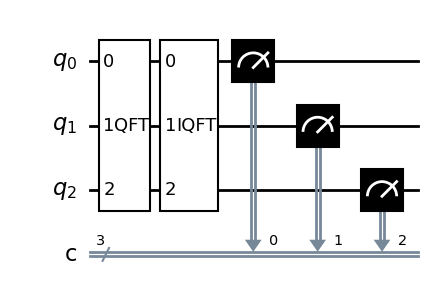

In [152]:
qc=QuantumCircuit(n,n)

qc.append(qft,range(n))
qc.append(iqft,range(n))

qc.measure(range(n),range(n))

qc.draw(output='mpl',style='bw')

In [149]:
def execute(qc,simulator):
    provider=QiskitRuntimeService()
    backend=provider.get_backend(simulator)
    job=backend.run(transpile(qc,backend),shots=1024)
    result=job.result()
    return result.get_counts()

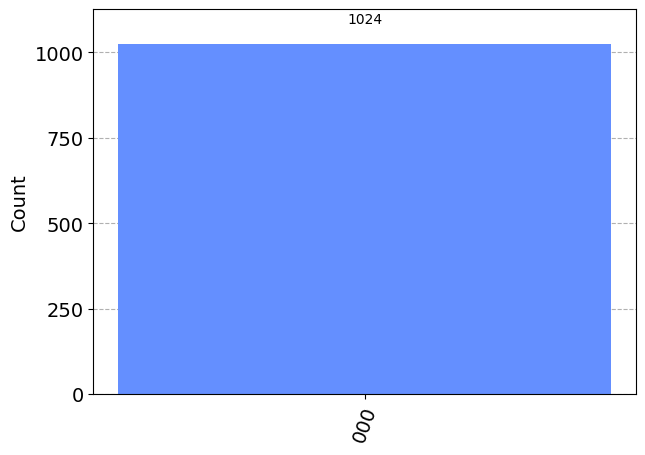

In [150]:
plot_histogram(execute(qc,simulator))